In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json, glob, os

COMBINATION2_RESULTS_CSV = os.path.join("results", "200-nodes-50-endpoints-20-subnets-3-layers-250000-time.csv")

In [7]:
def turn_json_results_to_csv(json_folder, output_csv):
    result_filenames = glob.glob(os.path.join(json_folder, "*.json"))
    
    results = []
    
    for filename in result_filenames:
        with open(filename, "r") as f:
            json_result = json.load(f)
        
        if json_result.get("Simulation Type", "None") == "None":
            json_result["Simulation Type"] = "NoMTD"
        results.append(json_result)
    
    df = pd.DataFrame(results)
    df.to_csv(output_csv, index=False)

In [8]:
# turn_json_results_to_csv(
#     os.path.join("results", "2-combination-results-second-run", "200-nodes-50-endpoints-20-subnets-3-layers-250000-time"), 
#     COMBINATION2_RESULTS_CSV
# )

In [9]:
combination2_results = pd.read_csv(COMBINATION2_RESULTS_CSV)

In [10]:
combination2_results.head()

,Unnamed: 0,Total Initial Vulnerabilities,Initial Vulns Per OS,Average Initial RoA Per OS,OS Types In Initial Network,Initial Hosts Without Vulnerabilities,Host Compromises,Vuln Compromises,Reuse Password Compromises,Password Spray Compromises,User Account Leaks,Vulnerabilities Exploited,MTD Statistics,Total MTD Events,Total MTD Blocking Hacker Events,Complete Time,Simulation Type
0,0,599,"{'centos': {'4': 44, '8': 7, '7': 31, '6': 17,...","{'centos': {'4': 0.04369380087991998, '8': 0.0...","{'centos 4': 10, 'centos 8': 16, 'ubuntu 20.04...",51,"{'record name': 'Host Compromises', 'x': [2023...","{'record name': 'Vuln Compromises', 'x': [2023...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'OSShuffle', 'x': [4231, 3902...",79,42,249999,"OSShuffle,ServiceShuffle"
1,1,705,"{'ubuntu': {'18.04': 27, '20.04': 21, '12.04':...","{'ubuntu': {'18.04': 0.05247768416411511, '20....","{'ubuntu 18.04': 11, 'centos 5': 8, 'ubuntu 20...",44,"{'record name': 'Host Compromises', 'x': [604,...","{'record name': 'Vuln Compromises', 'x': [604,...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...",[],0,0,249999,NoMTD
2,2,710,"{'centos': {'6': 20, '8': 9, '7': 16, '4': 21,...","{'centos': {'6': 0.04893814488153436, '8': 0.0...","{'centos 6': 8, 'freebsd 11': 15, 'windows xp'...",29,"{'record name': 'Host Compromises', 'x': [2720...","{'record name': 'Vuln Compromises', 'x': [2720...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'PortShuffle', 'x': [1189, 46...",80,52,249999,"IPShuffle,PortShuffle"
3,3,656,"{'windows': {'vista': 10, '8.1': 18, '10': 4, ...","{'windows': {'vista': 0.03498427937110447, '8....","{'windows vista': 2, 'centos 7': 15, 'windows ...",49,"{'record name': 'Host Compromises', 'x': [6898...","{'record name': 'Vuln Compromises', 'x': [6898...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'HostTopologyShuffle', 'x': [...",81,56,249999,HostTopologyShuffle
4,4,633,"{'freebsd': {'12': 35, '10': 31, '11': 32, '13...","{'freebsd': {'12': 0.05206485100090569, '10': ...","{'freebsd 12': 12, 'centos 7': 14, 'windows 8'...",34,"{'record name': 'Host Compromises', 'x': [172,...","{'record name': 'Vuln Compromises', 'x': [172,...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'IPShuffle', 'x': [2891, 1413...",78,69,249999,"HostTopologyShuffle,IPShuffle"


In [11]:
simulation2_types = combination2_results["Simulation Type"].unique()

In [12]:
simulation2_types

array(['OSShuffle,ServiceShuffle', 'NoMTD', 'IPShuffle,PortShuffle',
       'HostTopologyShuffle', 'HostTopologyShuffle,IPShuffle',
       'CompleteTopologyShuffle,PortShuffle', 'OSShuffle',
       'CompleteTopologyShuffle,HostTopologyShuffle', 'IPShuffle',
       'ServiceShuffle,UserShuffle', 'HostTopologyShuffle,UserShuffle',
       'IPShuffle,OSShuffle', 'IPShuffle,ServiceShuffle',
       'PortShuffle,ServiceShuffle', 'IPShuffle,UserShuffle',
       'PortShuffle', 'UserShuffle', 'PortShuffle,UserShuffle',
       'OSShuffle,PortShuffle', 'CompleteTopologyShuffle,IPShuffle',
       'HostTopologyShuffle,ServiceShuffle',
       'HostTopologyShuffle,OSShuffle', 'ServiceShuffle',
       'CompleteTopologyShuffle,OSShuffle', 'OSShuffle,UserShuffle',
       'CompleteTopologyShuffle,UserShuffle', 'CompleteTopologyShuffle',
       'HostTopologyShuffle,PortShuffle',
       'CompleteTopologyShuffle,ServiceShuffle'], dtype=object)

In [13]:
def parse_json_column_to_dataframe(df, column_name):
    column_str_list = df[column_name].to_list()
    df_list = []
    
    for row_str in column_str_list:
        try:
            df_list.append(json.loads(row_str.replace("'", '"')))
        except:
            print("ERROR WITH JSON DOCUMENT!")
            print(row_str)
    
    return pd.DataFrame(df_list)

In [15]:
def get_non_exposed_compromised_hosts(df):
    df_host_compromises = parse_json_column_to_dataframe(df, "Host Compromises")
    return df_host_compromises

combination2_results

,Unnamed: 0,Total Initial Vulnerabilities,Initial Vulns Per OS,Average Initial RoA Per OS,OS Types In Initial Network,Initial Hosts Without Vulnerabilities,Host Compromises,Vuln Compromises,Reuse Password Compromises,Password Spray Compromises,User Account Leaks,Vulnerabilities Exploited,MTD Statistics,Total MTD Events,Total MTD Blocking Hacker Events,Complete Time,Simulation Type
0,0,599,"{'centos': {'4': 44, '8': 7, '7': 31, '6': 17,...","{'centos': {'4': 0.04369380087991998, '8': 0.0...","{'centos 4': 10, 'centos 8': 16, 'ubuntu 20.04...",51,"{'record name': 'Host Compromises', 'x': [2023...","{'record name': 'Vuln Compromises', 'x': [2023...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'OSShuffle', 'x': [4231, 3902...",79,42,249999,"OSShuffle,ServiceShuffle"
1,1,705,"{'ubuntu': {'18.04': 27, '20.04': 21, '12.04':...","{'ubuntu': {'18.04': 0.05247768416411511, '20....","{'ubuntu 18.04': 11, 'centos 5': 8, 'ubuntu 20...",44,"{'record name': 'Host Compromises', 'x': [604,...","{'record name': 'Vuln Compromises', 'x': [604,...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...",[],0,0,249999,NoMTD
2,2,710,"{'centos': {'6': 20, '8': 9, '7': 16, '4': 21,...","{'centos': {'6': 0.04893814488153436, '8': 0.0...","{'centos 6': 8, 'freebsd 11': 15, 'windows xp'...",29,"{'record name': 'Host Compromises', 'x': [2720...","{'record name': 'Vuln Compromises', 'x': [2720...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'PortShuffle', 'x': [1189, 46...",80,52,249999,"IPShuffle,PortShuffle"
3,3,656,"{'windows': {'vista': 10, '8.1': 18, '10': 4, ...","{'windows': {'vista': 0.03498427937110447, '8....","{'windows vista': 2, 'centos 7': 15, 'windows ...",49,"{'record name': 'Host Compromises', 'x': [6898...","{'record name': 'Vuln Compromises', 'x': [6898...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'HostTopologyShuffle', 'x': [...",81,56,249999,HostTopologyShuffle
4,4,633,"{'freebsd': {'12': 35, '10': 31, '11': 32, '13...","{'freebsd': {'12': 0.05206485100090569, '10': ...","{'freebsd 12': 12, 'centos 7': 14, 'windows 8'...",34,"{'record name': 'Host Compromises', 'x': [172,...","{'record name': 'Vuln Compromises', 'x': [172,...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'IPShuffle', 'x': [2891, 1413...",78,69,249999,"HostTopologyShuffle,IPShuffle"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1445,692,"{'windows': {'10': 12, 'vista': 20, '8.1': 29,...","{'windows': {'10': 0.033236453764719634, 'vist...","{'freebsd 11': 11, 'windows 10': 12, 'centos 7...",39,"{'record name': 'Host Compromises', 'x': [875,...","{'record name': 'Vuln Compromises', 'x': [875,...","{'record name': 'Reuse Password Compromises', ...","{'record name': 'Password Spray Compromises', ...",{'record name': 'User Account Has Been Leaked ...,"{'record name': 'Vulnerabilities Exploited', '...","[{'record name': 'PortShuffle', 'x': [10278, 1...",81,63,249999,"OSShuffle,PortShuffle"
2896,1446,764,"{'freebsd': {'10': 43, '9': 48, '12': 25, '13'...","{'freebsd': {'10': 0.08671372693668777, '9': 0...","{'freebsd 10': 9, 'ubuntu 18.04': 16, 'windows...",41,"{'record name': 'Host Compromi

In [313]:
def compromised_histogram(mtd_strats, df):
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_title("Number of Compromised Hosts")
    ax.set_xlabel("Total Compromised Hosts")
    
    legend_list = []
    for mtd_strat  in mtd_strats:
        legend_list.append(mtd_strat)
        df_mtd = df.loc[df["Simulation Type"] == mtd_strat]
        host_compromises = parse_json_column_to_dataframe(df_mtd, "Host Compromises")
        ax.hist(host_compromises["total events"], bins=20, alpha = 0.6)
        
    ax.legend(legend_list)

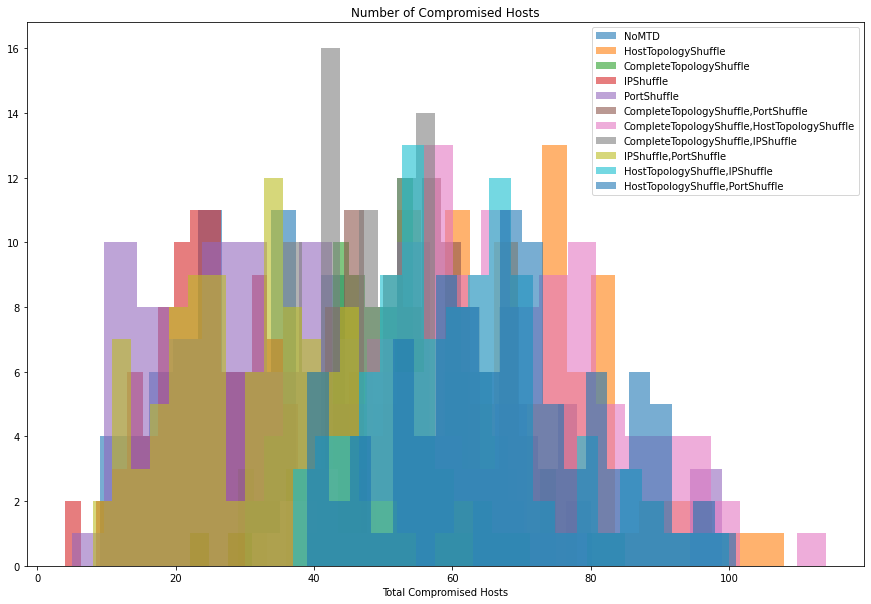

In [314]:
compare_ip_port_topology = [
    "NoMTD",
    'HostTopologyShuffle',
    'CompleteTopologyShuffle',
    'IPShuffle',
    'PortShuffle',
    'CompleteTopologyShuffle,PortShuffle',
    'CompleteTopologyShuffle,HostTopologyShuffle',
    'CompleteTopologyShuffle,IPShuffle',
    'IPShuffle,PortShuffle',
    'HostTopologyShuffle,IPShuffle',
    'HostTopologyShuffle,PortShuffle'
]

compromised_histogram(compare_ip_port_topology, combination2_results)

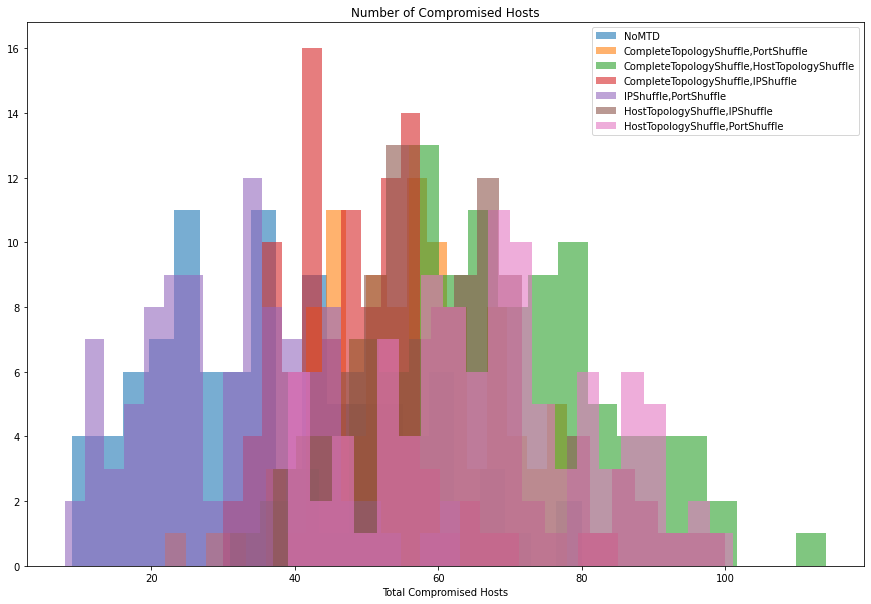

In [315]:
compare_ip_port_topology = [
    "NoMTD",
    'CompleteTopologyShuffle,PortShuffle',
    'CompleteTopologyShuffle,HostTopologyShuffle',
    'CompleteTopologyShuffle,IPShuffle',
    'IPShuffle,PortShuffle',
    'HostTopologyShuffle,IPShuffle',
    'HostTopologyShuffle,PortShuffle'
]

compromised_histogram(compare_ip_port_topology, combination2_results)

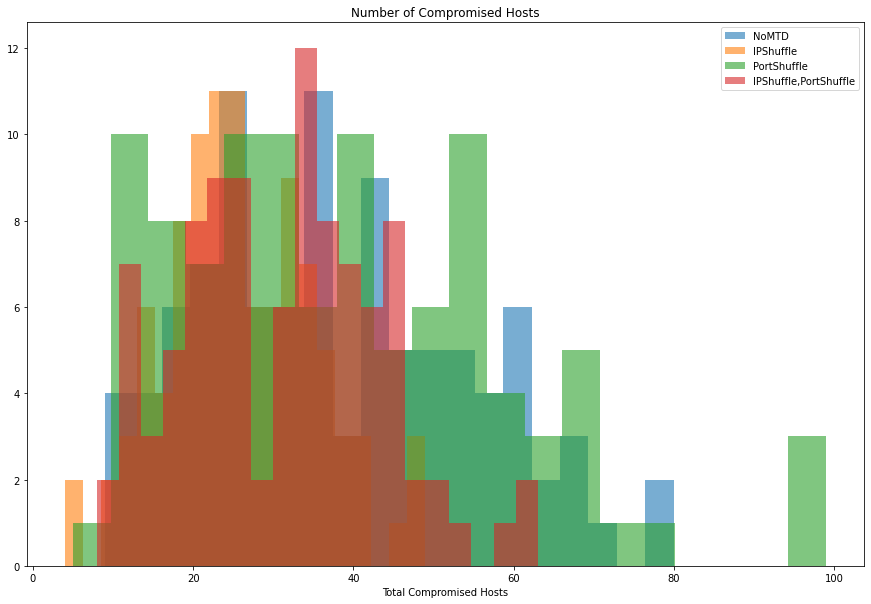

In [316]:
compare_ip_port_topology = [
    "NoMTD",
    'IPShuffle',
    'PortShuffle',
    'IPShuffle,PortShuffle'
]

compromised_histogram(compare_ip_port_topology, combination2_results)

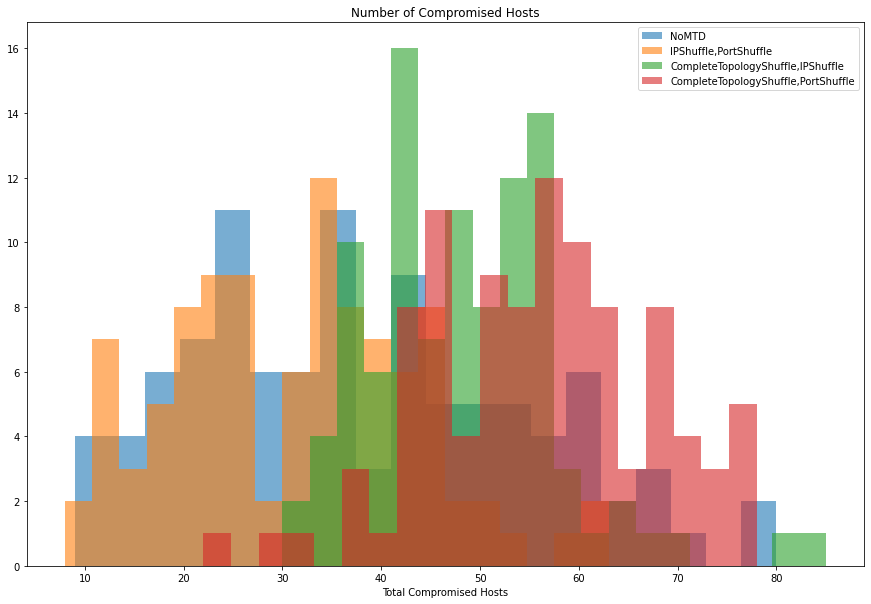

In [317]:
compare_ip_port_topology = [
    "NoMTD",
    'IPShuffle,PortShuffle',
    'CompleteTopologyShuffle,IPShuffle',
    'CompleteTopologyShuffle,PortShuffle'
]

compromised_histogram(compare_ip_port_topology, combination2_results)

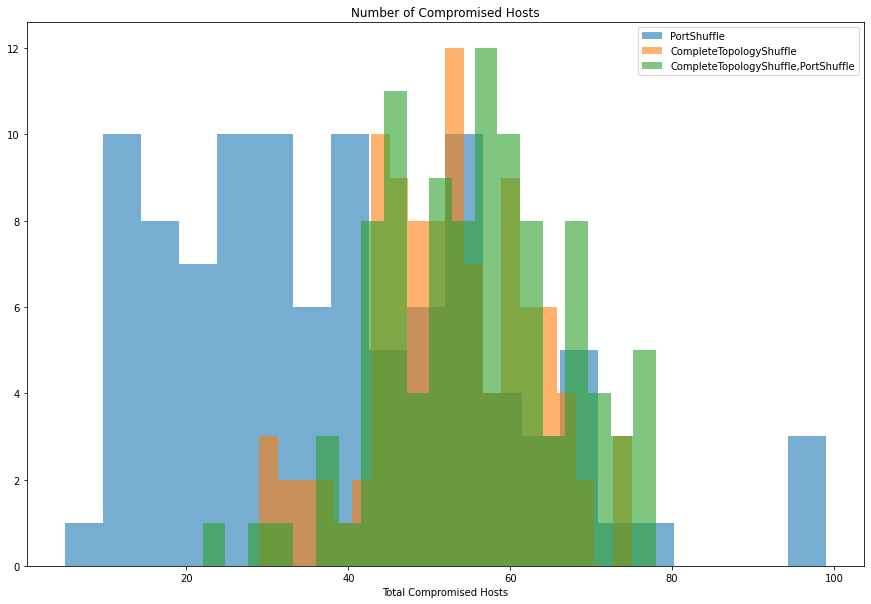

In [318]:
compare_ip_port_topology = [
    'PortShuffle',
    'CompleteTopologyShuffle',
    'CompleteTopologyShuffle,PortShuffle'
]

compromised_histogram(compare_ip_port_topology, combination2_results)

In [319]:
def compare_mtd_proportions(df, mtd_strat, compare_ratio_strat):
    df_mtd = df.loc[df["Simulation Type"] == mtd_strat]
    
    df_mtd_events = parse_json_column_to_dataframe(df_mtd, "MTD Statistics").to_numpy()
    df_mtd_host_compromises = parse_json_column_to_dataframe(df_mtd, "Host Compromises")["total events"].to_numpy()
    
    x_ratio_blocked = []
    y_hosts_compromised = []
    mtd_types_seen = []
    
    for index, mtd_strats_events in enumerate(df_mtd_events):
        total_blocked_events = 0
        total_compare_mtd_events = 0
        
        for mtd_strat_results in mtd_strats_events:
            mtd_type = mtd_strat_results["record name"]
            if not mtd_type in mtd_types_seen:
                mtd_types_seen.append(mtd_type)
                
            if mtd_type == compare_ratio_strat:
                total_compare_mtd_events += mtd_strat_results["total blocks"]
                
            total_blocked_events += mtd_strat_results["total blocks"]
            
        try:
            x_ratio_blocked.append(total_compare_mtd_events / total_blocked_events)
            y_hosts_compromised.append(df_mtd_host_compromises[index])
        except:
            pass
        
    fig, ax = plt.subplots(figsize=(15,10))
    legend_list = [mtd_strat]
    ax.set_title("Ratio of Type of MTD Blocking Hacker Event and Hosts Compromised")
    ax.set_xlabel("Ratio of Strategy {} Blocking Hacker".format(compare_ratio_strat))
    ax.set_ylabel("Hosts Compromised")
    ax.scatter(x_ratio_blocked, y_hosts_compromised)
    
    for mtd_type in mtd_types_seen:

        hosts_compromised = parse_json_column_to_dataframe(df.loc[df["Simulation Type"] == mtd_type], "Host Compromises")["total events"].to_list()
        if mtd_type == compare_ratio_strat:
            x = [1]*len(hosts_compromised)
        else:
            x = [0]*len(hosts_compromised)
            
        legend_list.append(mtd_type)
        ax.scatter(x, hosts_compromised)

    ax.legend(legend_list)
        
    

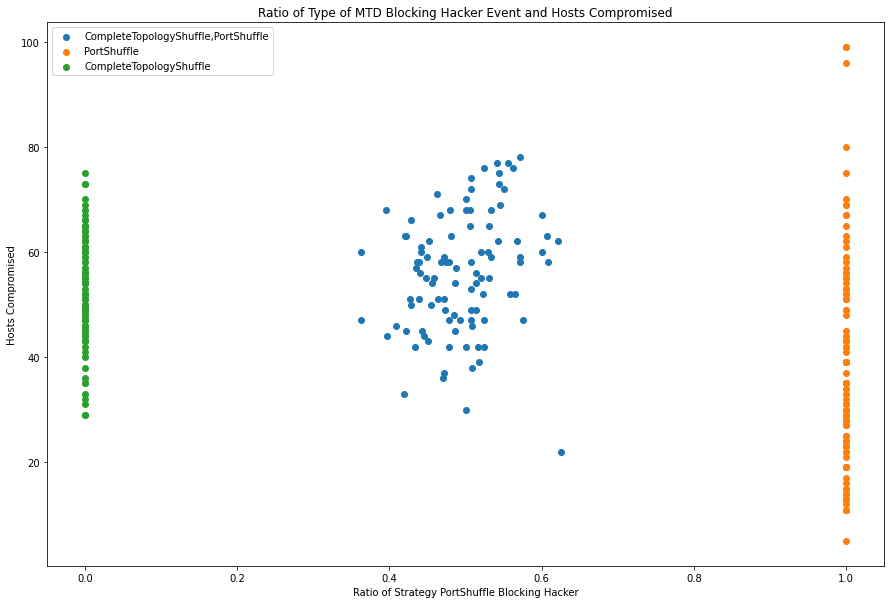

In [320]:
compare_mtd_proportions(combination2_results, "CompleteTopologyShuffle,PortShuffle", "PortShuffle")

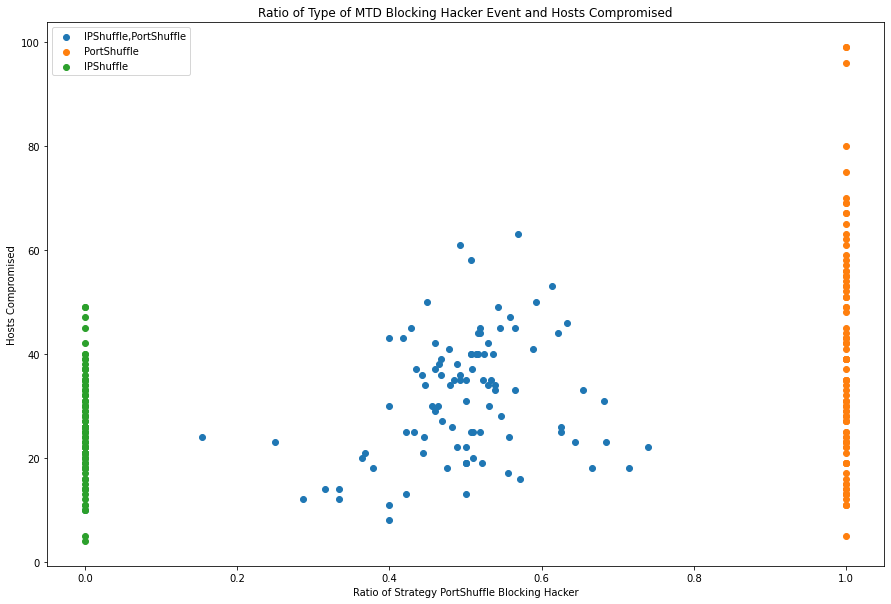

In [321]:
compare_mtd_proportions(combination2_results, "IPShuffle,PortShuffle", "PortShuffle")

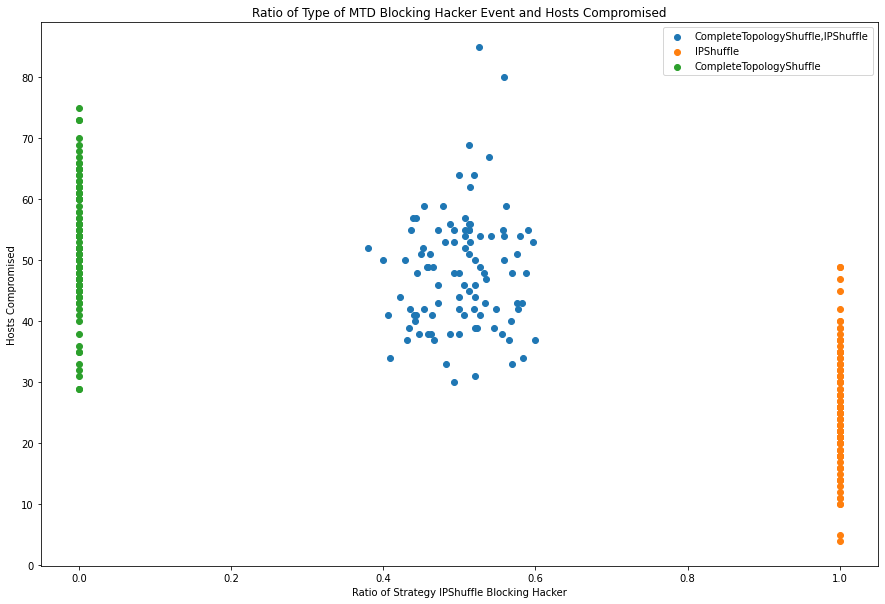

In [322]:
compare_mtd_proportions(combination2_results, 'CompleteTopologyShuffle,IPShuffle', 'IPShuffle')

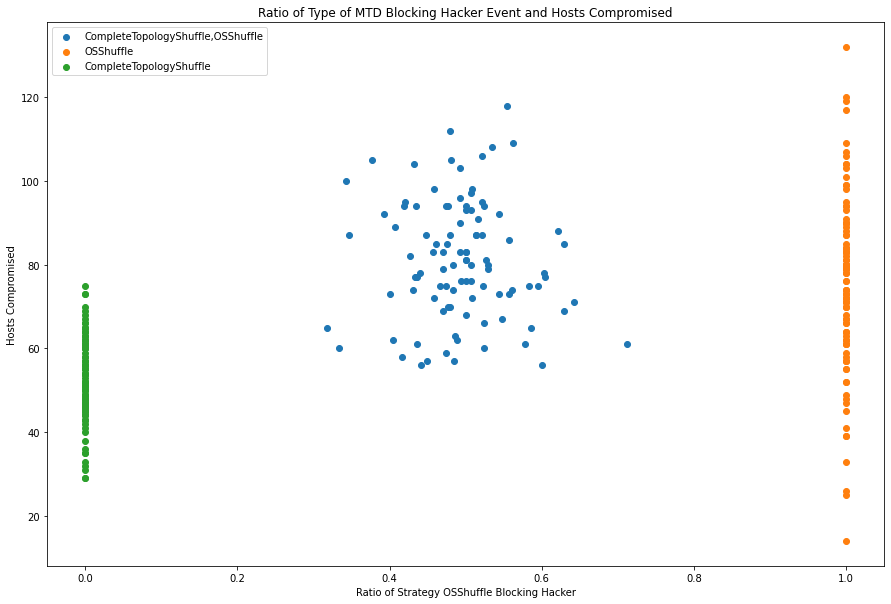

In [323]:
compare_mtd_proportions(combination2_results, 'CompleteTopologyShuffle,OSShuffle', 'OSShuffle')

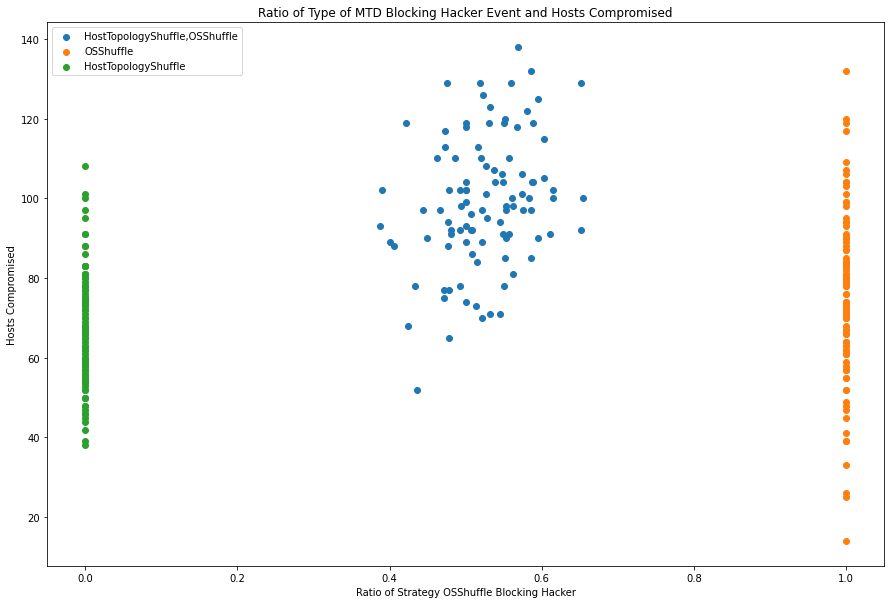

In [324]:
compare_mtd_proportions(combination2_results, 'HostTopologyShuffle,OSShuffle', 'OSShuffle')

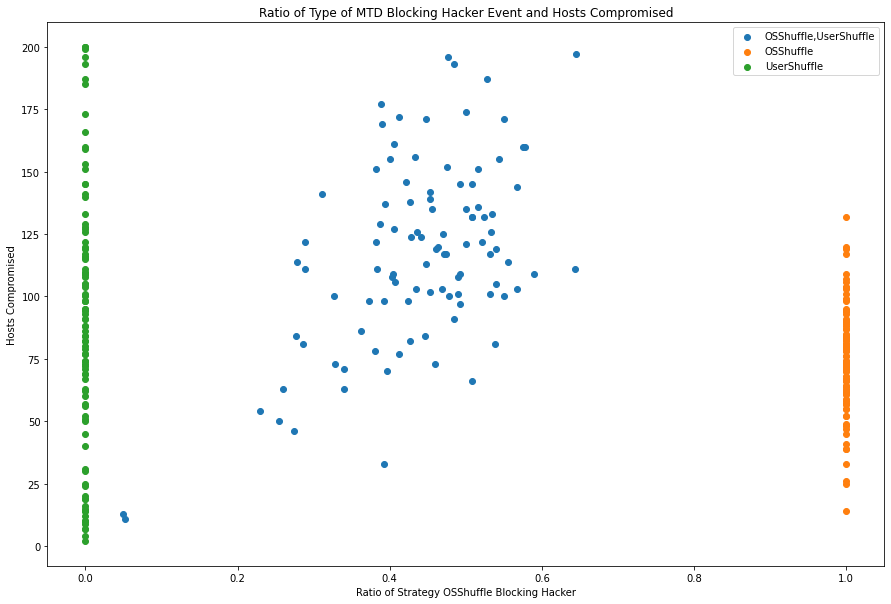

In [325]:
compare_mtd_proportions(combination2_results, 'OSShuffle,UserShuffle', 'OSShuffle')

In [327]:
def compare_hosts_compromised_with_blocked_mtd(df, mtd_strats):
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_title("Hosts Compromised in Comparison to Time MTD Blocked")
    ax.set_xlabel("Times MTD Stragies Blocked Hacker")
    ax.set_ylabel("Hosts Compromised")
    
    legend_list = []
    for mtd_strat in mtd_strats:
        legend_list.append(mtd_strat)
        df_mtd = df.loc[df["Simulation Type"] == mtd_strat]
        
        df_mtd_events = df_mtd["Total MTD Blocking Hacker Events"].to_numpy()
        mtd_host_compromises = parse_json_column_to_dataframe(df_mtd, "Host Compromises")["total events"].to_numpy()
        
        ax.scatter(df_mtd_events, mtd_host_compromises)
        
    ax.legend(legend_list)

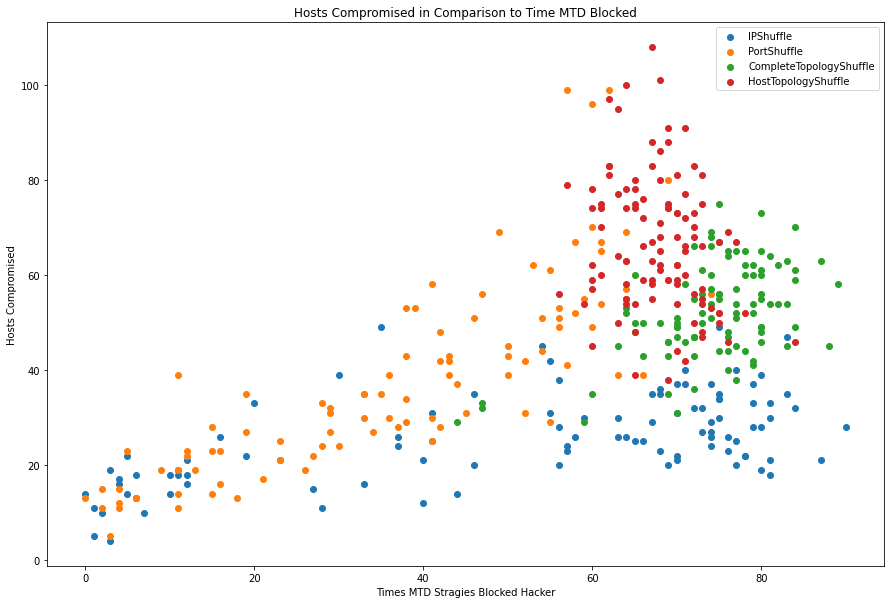

In [328]:
test_strats = [
    "IPShuffle",
    "PortShuffle",
    "CompleteTopologyShuffle",
    "HostTopologyShuffle"
]

compare_hosts_compromised_with_blocked_mtd(combination2_results, test_strats)

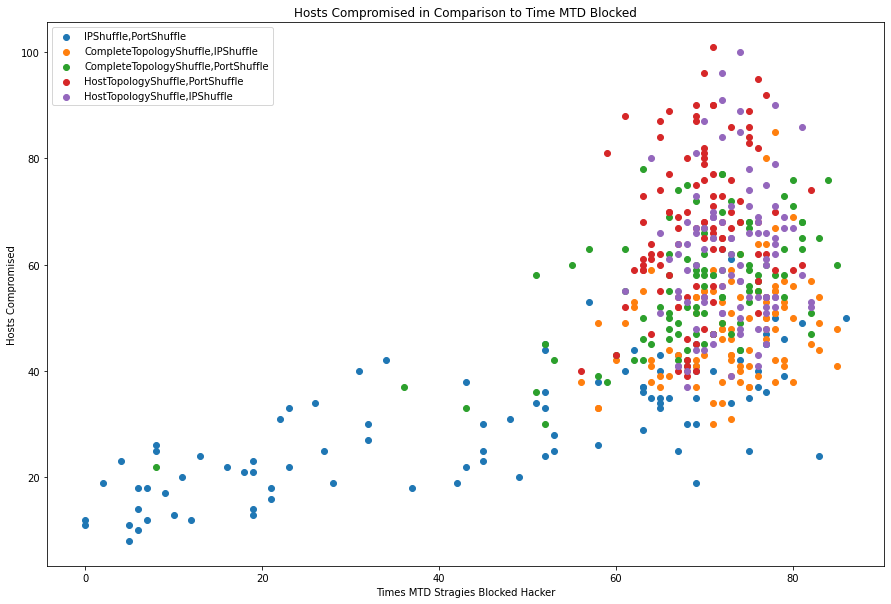

In [329]:
test_strats = [
    "IPShuffle,PortShuffle",
    "CompleteTopologyShuffle,IPShuffle",
    "CompleteTopologyShuffle,PortShuffle",
    "HostTopologyShuffle,PortShuffle",
    "HostTopologyShuffle,IPShuffle"
]

compare_hosts_compromised_with_blocked_mtd(combination2_results, test_strats)

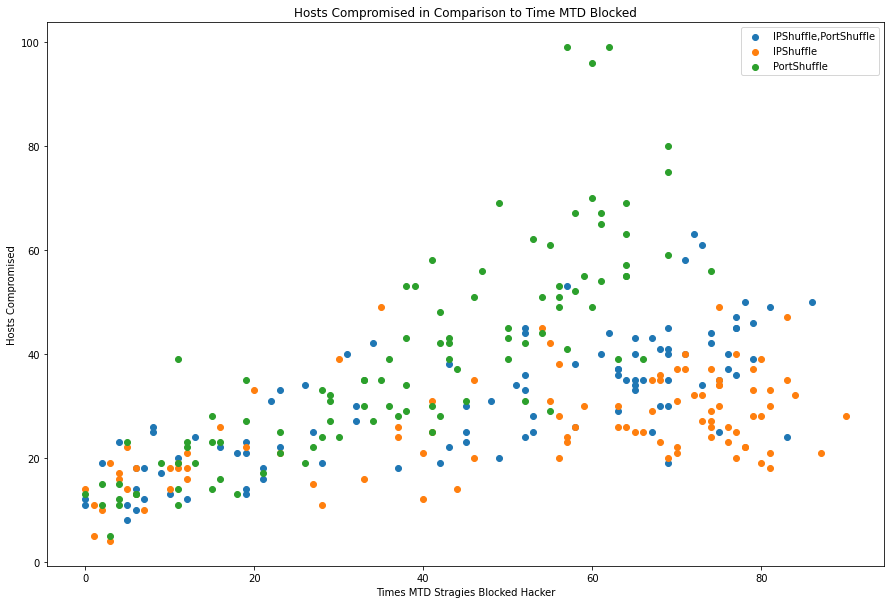

In [330]:
test_strats = [
    "IPShuffle,PortShuffle",
    "IPShuffle",
    "PortShuffle"
]

compare_hosts_compromised_with_blocked_mtd(combination2_results, test_strats)

In [335]:
def get_medians(df):
    mtd_types = df["Simulation Type"].unique()
    
    averages = []
    for mtd_type in mtd_types:
        df_mtd = df.loc[df["Simulation Type"] == mtd_type]
        blocked_events = parse_json_column_to_dataframe(df_mtd, "Host Compromises")["total events"].to_numpy()
        avg_mtd_host_compromises = np.median(blocked_events)
#         q1 = np.percantile(blocked_events, 25)
#         q3 = np.percentile(blocked_events, 75)
        averages.append((mtd_type, avg_mtd_host_compromises))
        
    averages = np.array(sorted(averages, key = lambda x: x[1]))
    return np.array(averages[:,0], dtype=str), np.array(averages[:,1], dtype=np.float64)

In [336]:
avg_host_compromises = get_medians(combination2_results)

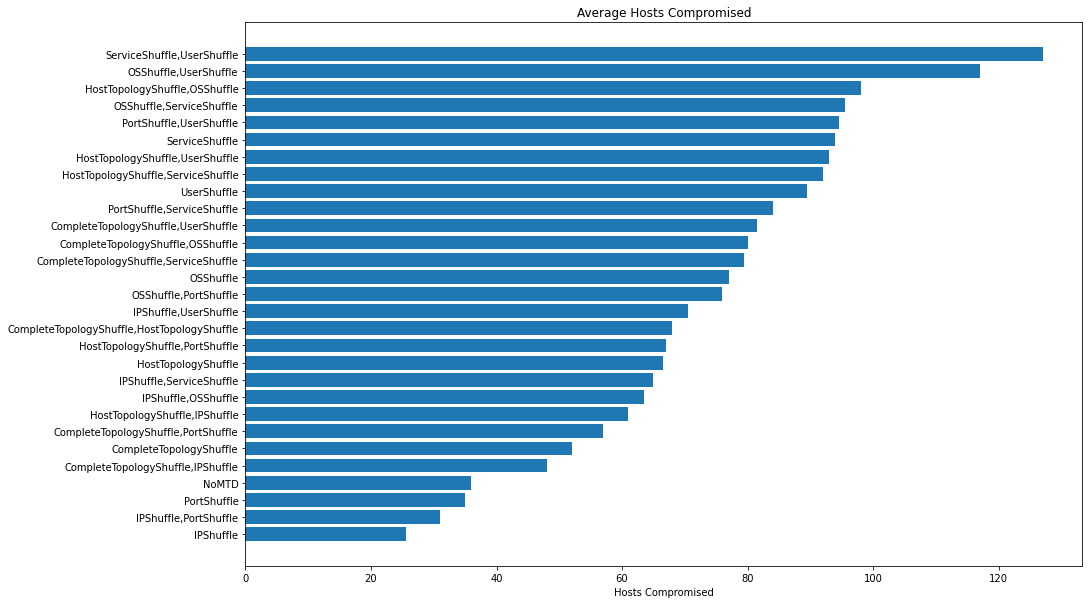

In [337]:
fig, ax = plt.subplots(figsize=(15,10))

ax.barh(avg_host_compromises[0], avg_host_compromises[1])
ax.set_title("Average Hosts Compromised")
ax.set_xlabel("Hosts Compromised")

plt.show()

In [338]:
def expand_time_series(x, y, total_time=250000):
    new_x = []
    new_y = []
    
    next_x_i = 0
    next_x = x[0]
    prev_y = 0
    
    for i in range(total_time):
        if i == next_x:
            prev_y = y[next_x_i]
            next_x_i += 1
            if next_x_i >= len(x):
                next_x_i = len(x) - 1
            next_x = x[next_x_i]
            
        new_x.append(i)
        new_y.append(prev_y)
        
    return new_x, new_y

def get_host_compromised_time_series(df, mtd_strat):
    df_mtd = df.loc[df["Simulation Type"] == mtd_strat]
    
    all_old_x = []
    all_old_y = []
    
    all_x = []
    all_compromised_hosts = []
    
    for index, hosts_compromised_row in parse_json_column_to_dataframe(df_mtd, "Host Compromises").iterrows():
        x = [0] + hosts_compromised_row['x']
        y = [0] + [y_v + 1 for y_v in hosts_compromised_row['cumulative y']]
        all_old_x.append(x)
        all_old_y.append(y)
        all_x, new_y = expand_time_series(x,y)
        all_compromised_hosts.append(new_y)

    avg_time = np.mean(np.array(all_compromised_hosts), axis=0)
    return all_old_x, all_old_y, all_x, avg_time

In [339]:
def plot_compromised_times(df, mtd_strat):
    all_old_x, all_old_y, all_x, avg_time = get_host_compromised_time_series(df, mtd_strat)
    
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_title("Average Time To Compromise Host MTD: {}".format(mtd_strat))
    ax.set_ylabel("Hosts Compromised")
    ax.set_xlabel("Time")
    
    for i, x in enumerate(all_old_x):
        y = all_old_y[i]
        
        ax.plot(x,y, alpha=0.3)

    ax.plot(all_x, avg_time)

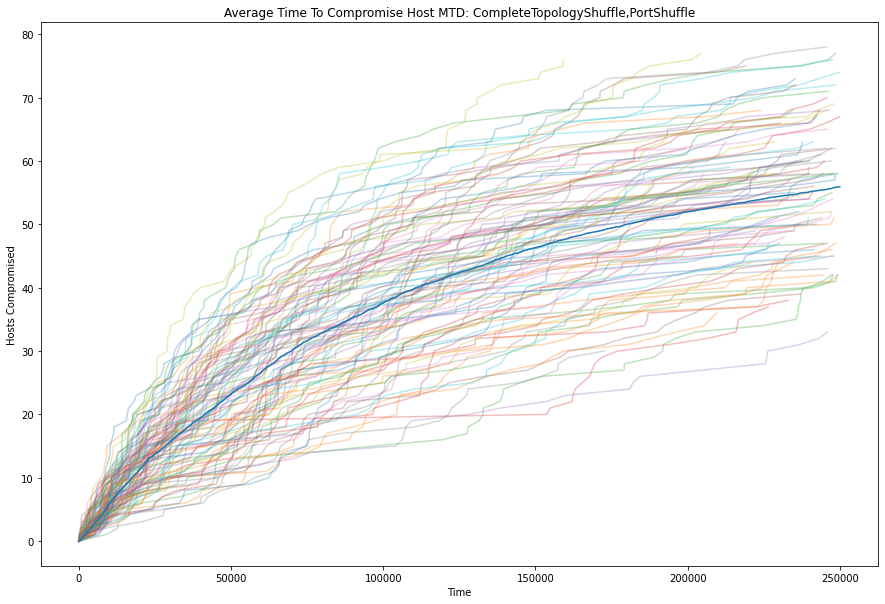

In [340]:
plot_compromised_times(combination2_results, "CompleteTopologyShuffle,PortShuffle")

In [278]:
def plot_all_avg_time_series(df, mtd_filter=None):
    mtd_types = df["Simulation Type"].unique()
    
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_title("All Average Time Series")
    ax.set_ylabel("Hosts Compromised")
    ax.set_xlabel("Time")
    
    legend_list = []
    
    if not mtd_filter == None:
        mtd_types = mtd_filter
    
    for mtd_type in mtd_types:
        _x, _y, all_x, avg_time = get_host_compromised_time_series(df, mtd_type)
        ax.plot(all_x, avg_time)
        legend_list.append(mtd_type)
        
    ax.legend(legend_list)

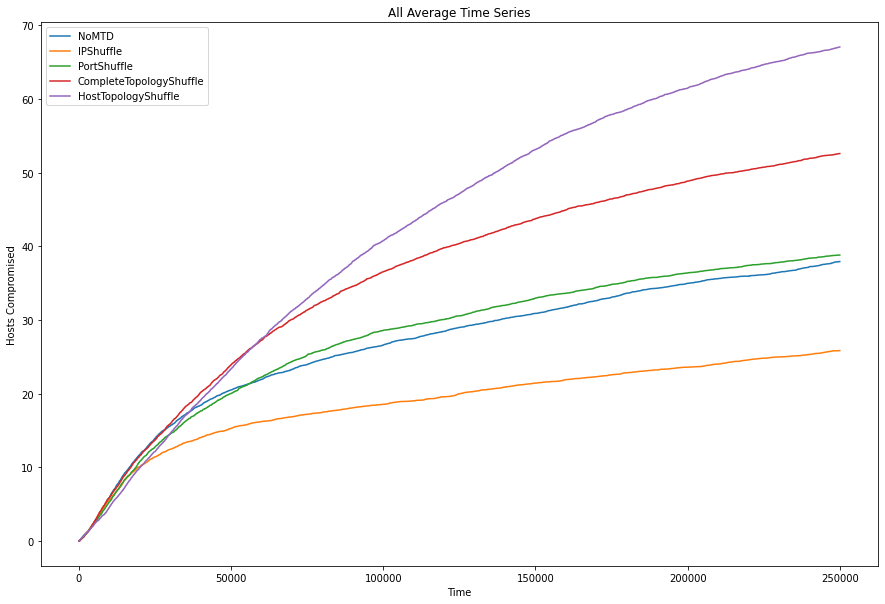

In [341]:
plot_all_avg_time_series(combination2_results, mtd_filter=[
    "NoMTD",
    "IPShuffle",
    "PortShuffle",
    "CompleteTopologyShuffle",
    "HostTopologyShuffle"
])